# Dataset 

> **Dataset source**: https://www.kaggle.com/joniarroba/noshowappointments<br>
**Name**: Medical Appointment No Shows <br>
**Major Question**: Why do 30% of patients miss their scheduled appointments?<br>

# some of features description


#### 04 - DataMarcacaoConsulta
The day of the actuall appointment, when they have to visit the doctor. 
### 05 - DataAgendamento 
The day someone called or registered the appointment.
### 07 - Neighbourhood 
Where the appointment takes place.
### 08 - Scholarship
Government provides financial aid to poor Brazilian families
### SMS_received 
1 or more messages sent to the patient.   






# note:
Female is the greater proportion, woman takes way more care of there health in comparison to man.

# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Breif discreption**: the data set is related to the medical field in which it contains some features that was calculated in an attempt to understand the patient behaviour<br>
> **main problem** : paitents register an appointment and not showing up , this can have many negative impacts financilly also taking other paitents appointments time this can lead to the organization overbooking like in airports to reduce the losses ,leading to appointment clashes etc. <br>
>**target(dependent variable)**: No-show  (**NO-show= Yes --> the person didnt show for app**)

>**Reaserch questions**<br>


1) --women has the higher proportion but who commites the most to their appointments ?<br>

2) -- How having a scholarship (financial aid) affect showing ? <br>
 does the paitent become more careless or come on time<br><br>
 
 
3) --does the handcap feature play a major rule in not showing as mostly a handcap person would need a company?,so it will be fitting one appointment for two persons scheduels!! <br><br>

4) -- Does sending SMS to paitent makes him remeber the appointment or feeling resposible that the doctor is waiting, having the ability to cancel instead of not showing?<br>

5) how the age affect the showing up

In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#loading dataset
df= pd.read_csv('KaggleV2-May-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [3]:
#dataset shape (rows,columns)
df.shape  # dataset has 14 feature and 110527 record

(110527, 14)

**feature <br>
1- ID'S <br>
2- date_time<br>
3-catagorical (Age , Gender, scholarship,Diabetes,Alcoholism,Handcap,Sms_received,No-show)<br>
4-Numerical (Age)**

In [4]:
#description for data distribution Quartiles
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Age and Handcap features need further investigation because of their ranges**

In [5]:
#handcap categories
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

**the dataset description says that its True or False (bool feature)<br>
conc--> this descrition is wrong and it is only catagorical feature with different ranges of handcap**

In [6]:
# the numeric features distribution
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

**notice**
there are errors in the data acquisition min=-1
max=115

the distribution is skewed


**Decision** will depend on how many out of range Age patients are there
the AGE OF -1 will be dropped as its impossible
- need to check if there is Age of 0

the Age of 115 is propable
- need to check to if there is ages between 




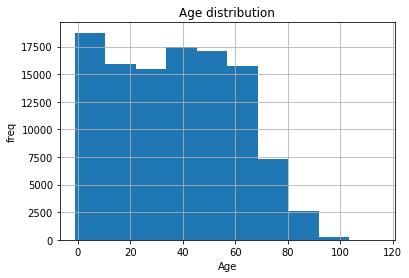

In [7]:
#ploting age distribution
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('freq')
df.Age.hist()

How many Patients with these age ranges

In [8]:
#number of paitents with out of range +ve in dataset

#from the histogram
#threshold of 90 was choosen because the minimum records belong to ages bigger than 90

OOR_POS=df[df.Age>=90]
OOR_POS.shape   #417 record of 110527 record

(417, 14)

In [9]:
#number of paitents in the population
df['PatientId'].nunique()

62299

In [10]:
#number of out of range  from the number of patients(unique ID) +ve
OOR_POS['PatientId'].nunique()  # a 248 patient out of 62299 

248

In [11]:
#number of no labels 
OOR_POS['No-show'].describe()

count     417
unique      2
top        No
freq      332
Name: No-show, dtype: object

In [12]:
#out of range -ve
OOR_NEG=df[df.Age<=0]
OOR_NEG['No-show'].describe()

count     3540
unique       2
top         No
freq      2901
Name: No-show, dtype: object

In [13]:
#number of out of range  from the number of patients(unique ID) -ve
OOR_NEG['PatientId'].nunique()    # a 2083 patient out of 62299 

2083

**notice**<br>
the freq of the negative Age is Not showing so the Age was not given because they didnt come<br>
for +ve oor belong to 248 patients <br> record=417
for -ve oor belong to 2331 patients <br> record=3540

a sum of 2331 patient with a 3957 record


these records wont be dropped as after further investigation it appears to be an indication of not showing these patient segment needs to be separated for further investigation
if the +ve oor being hadcaped  etc

and does the patientsID exist in the dataset with the real age or not  (**this segment is very small so i will drop these records<br> and it represents only record 3957 out of 110527   only 3% of the records**)

In [14]:
df.info() #checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**noticed** <br>
1) paitentID is Float<br>
2) the boolean (categorical) features appeares as numerical  <br>
3) the target feature and gender are categorical (may need to have a mask , encoded)<br>
4) appointment and schedueled date data features have to be datetime object ----(doesnt affect my research questions)

In [15]:
#check for null values it appeared in previous cell however this format to see clearly
df.isnull().sum().any()

False

In [16]:
#check for duplicates
df.duplicated().any()

False

In [17]:
#making sure (AppointmentID) are unique (no clashed appointments)
df['AppointmentID'].nunique()

110527


### Data Cleaning 

converting PatientID type to int  but we'll need to make sure that the number of paitents wasnt affected by this
as there is a chance of combining number of paitents together if the ID  was based on the decimels that will be rounded


**Handling Mistyped features**

In [18]:
# set paitent id to int instead of float
df['PatientId']=df['PatientId'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [19]:
#checking effect
df['PatientId'].nunique()          # befor 62299 after 62299 so it wasnt affected

62299

In [20]:
# conver AppointmentDay to date time object
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

**Handling Out of Range Records  (drop)**

In [21]:
#droping out of range +ve and -ve 
df = df.drop(df[df.Age >= 90].index)
df = df.drop(df[df.Age <= 0].index)

In [22]:
#checking the min and max
df['Age'].describe()            #minimum age is 1 and maximum is 89

count    106570.000000
mean         38.103772
std          22.250769
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max          89.000000
Name: Age, dtype: float64

**making a datafram with only the unique values of patient ID to be able to analyse the categories**

In [23]:
#keep only one record for each patient by droping others

df_nodup=df.drop_duplicates('PatientId')
#df_nodup

<a id='eda'></a>
## Exploratory Data Analysis

Text(0.5, 1.0, 'the distribution of the target')

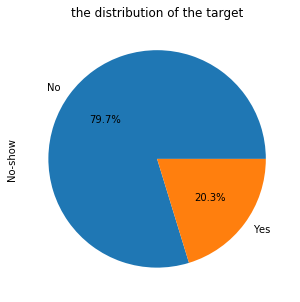

In [24]:
#the distribution of the target

ax =(df['No-show'].value_counts()*100.0 
     /len(df)).plot.pie(autopct='%.1f%%',figsize =(5,5))

plt.title("the distribution of the target")

the dataset is biased towards showing 
people that dont show up are about 20.3 % after dropping oor Ages

### Research Question 1 (women has the higher proportion but who commites the most to their appointments )

In [25]:
#the number of male patients

Male=df.query("Gender=='M'")['PatientId'].nunique()
Male

21120

In [26]:
#the number of female patients

Female=df.query("Gender=='F'")['PatientId'].nunique()

Text(0.5, 1.0, 'the percentage of female to male records')

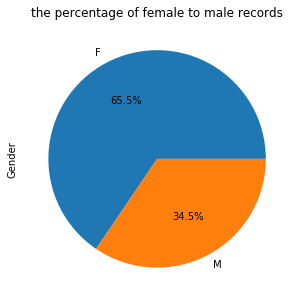

In [27]:
#the percentage of female to male records

ax = (df['Gender'].value_counts()*100.0 
      /len(df)).plot.pie(autopct='%.1f%%',figsize =(5,5)) 
plt.title("the percentage of female to male records")

Text(0.5, 1.0, 'the percentage of female to male patients')

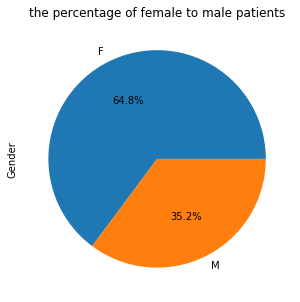

In [28]:
#the percentage of female to male patients

ax = (df_nodup['Gender'].value_counts()*100.0 
      /(len(df_nodup))).plot.pie(autopct='%.1f%%',figsize =(5,5))

plt.title("the percentage of female to male patients")

**contribution of Gender approximatly didnt change this means that most probably the people have the same average of appointments**

Text(0, 0.5, 'patient ID')

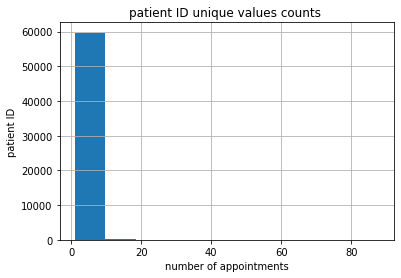

In [29]:
#plot how many appointments does the one paitent scheduel or take

df['PatientId'].value_counts().hist()

plt.title("patient ID unique values counts ")

plt.xlabel('number of appointments')
plt.ylabel('patient ID')

In [30]:
#finding the average number for appointments taken by patient
df['PatientId'].value_counts().describe()

count    60025.000000
mean         1.775427
std          1.791627
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         88.000000
Name: PatientId, dtype: float64

the assumption is approximatley right if we neglected the outliers like the 88 appointment for one person

**refrence **https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
Categorical features analysis using Bivariat Analysis ref= ** https://seaborn.pydata.org/generated/seaborn.countplot.html

In [31]:
#pairplot for bivariate analysis
def pairplot(k,d):
    
    ax=sns.countplot(x=k,data=d,hue='No-show')  #pairplot
    
   
    bars = ax.patches
    half = int(len(ax.patches)/2)  
    left_bars = bars[:half]
    right_bars = bars[half:]
    
    #calculating the bars heights
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        
        #Adding the percentage to the plot
        ax.text(left.get_x() + left.get_width()/2.
                , height_l + 40, '{0:.0%}'.format(height_l/total)
                , ha="center")
        
        
        ax.text(right.get_x() + right.get_width()/2.
                , height_r + 40, '{0:.0%}'.format(height_r/total)
                , ha="center")

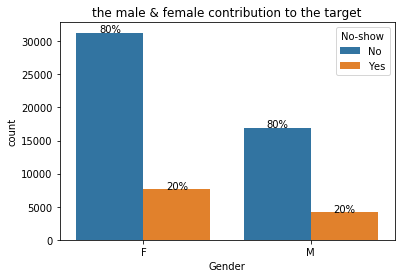

In [32]:
#the male & female contribution to the target
pairplot('Gender',df_nodup)

plt.title("the male & female contribution to the target");


men and women have the same commitment levels towards the target feature


### Research Question 2  (-- How having a scholarship (financial aid) affect showing ?
does the paitent become more careless or come on time)

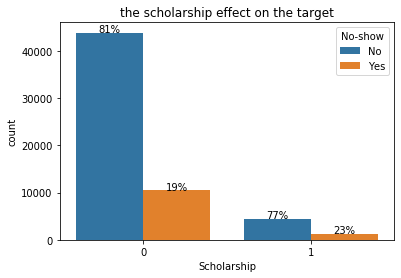

In [33]:
#plot the scholarship label vs Gender percentage

plt.title("the scholarship effect on the target")
pairplot('Scholarship',df_nodup)

In [34]:
#number of paitent with scholarship in the cleaned dataset 

df_nodup['Scholarship'].value_counts()    #no duplicates

0    54268
1     5757
Name: Scholarship, dtype: int64

In [35]:
#number of paitent with scholarship on original dataset

df['Scholarship'].value_counts()

0    95761
1    10809
Name: Scholarship, dtype: int64

**as a person averagely having 1.7 app i have assumed that if he registered two app he will either show up both times or not <br> people that have no scholarships are the majority  the graph shows that 23% doesnt show up for those who have scholarship which is higher than those without<br>
in other words not having a scholarship tends to show up more often**

### Research Question 3 (does the handcap feature play a major rule in not showing as mostly a handcap person would need a company?,so it will be fitting one appointment for two persons scheduels!! )

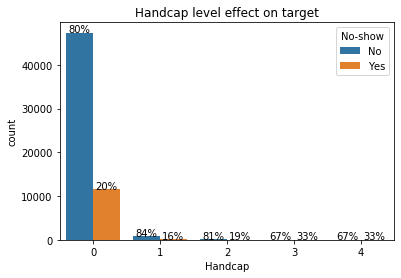

In [36]:
#handcap contribution to showing up

pairplot('Handcap',df_nodup)
plt.title("Handcap level effect on target");


as we can see the majority are not handcap<br>
people who are not handcap tends to not show up more<br> 
and the percentege of not showing up keeps decreasing till it reaches 3 and 4 <br>

### Research Question 4 ( -- Does sending SMS to paitent makes him remeber the appointment or feeling resposible that the doctor is waiting, having the ability to cancel instead of not showing?)

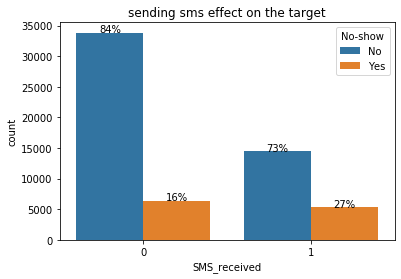

In [37]:
#sms receiving vs showing up effect

pairplot('SMS_received',df_nodup)
plt.title("sending sms effect on the target");


people who receive SMS tend not to show up more than those who dont

### Research Question 5 ( -- how the age affect the showing up)

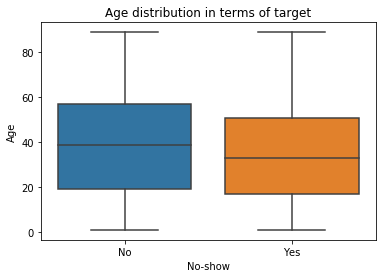

In [38]:
# box plot is very useful when there is a continueous and catagorical feature

sns.boxplot(x = df_nodup['No-show']
            , y = df_nodup['Age']); 

plt.title("Age distribution in terms of target");


In [39]:
#inter quartile range
df_nodup['Age'].groupby(df_nodup['No-show']).describe()

,count,mean,std,min,25%,50%,75%,max
No-show,,,,,,,,
No,48263.0,38.444046,22.968344,1.0,19.0,39.0,57.0,89.0
Yes,11762.0,34.737375,21.299935,1.0,17.0,33.0,51.0,89.0


the IQR inter quartile range for the not showing (and median) is a little lower than for those who show this means that as the age increases the dendency of people to show up increases<br>

in other words older people are more committed 

<a id='conclusions'></a>
## Conclusions

The data  is biased 79% to 20% for the target feature
thats why eventhough some features appears to be affecting the target feature , it is not a significant difference in percentages

# Q 1-----------women & commitment---------------------------
men and women have the same commitment levels towards the target feature  80% of both gender will show up

# Q 2-----------scholarship(financial aid)---------------------------

people not having a scholarship tends to show up more often
the difference is 81% to 77%

# Q 3--------------Handcap------------------------

the majority are not handcap
people who are not handcap tends to not show up more
and the percentege of not showing up keeps decreasing till it reaches 3 and 4


# Q 4 -----------sms----------------------------
people who receive SMS tend not to show up more than those who dont

84 % to 73%

**the timing of the sms should be analysed as this strange effect can probably happen because they send the messege when the patient is late , not to remind him**

# Q 5 -----------Age effect----------------------------
IQR end (for people showing =57)
IQR end (for people not showing =51)
**the older the more likely to show up**

# -----------


--------------------------------------------------------
#the bias in the dataset regarding the target made the pairwise plots endup with the same percentages approximately.#

# **Limitation**

1- dataset biased and not balanced in terms of the target feature <br>
2- SMS sending time is not included in the features this will help in determining whether the message was sent because the paitent was late or as a reminder<br>
3- the number of appointmets per person (mean=1.7),the dataset need to include more appointments for the person to be able to test the patient behaviour well.

